#### Let's Do it!       ---------- بسم الله الرحمن الرحيم ----------

#### Objective:
*الداتاست تتعقب مبيعات الأفوكادو بناءً على نوعه (عضوي أو تقليدي) و المناطق الجغرافية (مدن أو مناطق في الولايات المتحدة). تحتوي أيضًا على تفاصيل عن حجم المبيعات وسعر الأفوكادو في تواريخ معينة.*

#### -------------------- Data Column Understanding ---------------------
**date:** *التاريخ الذي تم فيه تسجيل البيانات.*

**average_price:**   *متوسط سعر الأفوكادو في ذلك اليوم.*

**total_volume:**  *إجمالي حجم المبيعات في هذا اليوم.*

**4046, 4225, 4770:**  *أكواد تمثل أنواع مختلفة من الأفوكادو حسب حجمها، كل رقم يحدد نوع معين (مثل حجم كبير أو صغير).*

**total_bags:**  *إجمالي عدد الأكياس التي تم بيعها.*

**small_bags, large_bags, xlarge_bags:**  *الأعداد المفصلة لأحجام الأكياس (صغيرة، كبيرة، وعالية الحجم).*

**type:**  *نوع الأفوكادو (عضوي أو تقليدي).*

**year:**  *السنة التي تم فيها البيع.*

**geography:**  *المنطقة الجغرافية أو المدينة التي تم فيها البيع*

#### ----------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Downloads\\avocado.csv')
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [3]:
from itertools import chain
import pandas as pd

# تعريف الأعياد بشكل منظم حسب المناسبة
us_holidays_dict = {
    'New Year\'s Day': ['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01'],
    'Memorial Day': ['2015-05-25', '2016-05-30', '2017-05-29', '2018-05-28', '2019-05-27', '2020-05-25'],
    'Independence Day': ['2015-07-04', '2016-07-04', '2017-07-04', '2018-07-04', '2019-07-04', '2020-07-04'],
    'Labor Day': ['2015-09-07', '2016-09-05', '2017-09-04', '2018-09-03', '2019-09-02', '2020-09-07'],
    'Thanksgiving Day': ['2015-11-26', '2016-11-24', '2017-11-23', '2018-11-22', '2019-11-28', '2020-11-26'],
    'Christmas Day': ['2015-12-25', '2016-12-25', '2017-12-25', '2018-12-25', '2019-12-25', '2020-12-25'],
    'Easter Sunday': ['2015-04-05', '2016-03-27', '2017-04-16', '2018-04-01', '2019-04-21', '2020-04-12'],
    'Veterans Day': ['2015-11-11', '2016-11-11', '2017-11-11', '2018-11-11', '2019-11-11', '2020-11-11']
}

# تحويل كل التواريخ إلى datetime.date
us_holidays = pd.to_datetime(list(chain.from_iterable(us_holidays_dict.values()))).date

# التأكد إن العمود 'date' بصيغة date فقط
df['date'] = pd.to_datetime(df['date']).dt.date

# إضافة العمود is_holiday
df['is_holiday'] = df['date'].isin(us_holidays).astype(int)

df.head()


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,is_holiday
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,0
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,0
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,0
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,0
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,0


In [4]:
df['is_holiday'].value_counts()

0    28941
1     1080
Name: is_holiday, dtype: int64

In [5]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Print the earliest and latest dates in the dataset
print("first date:", df['date'].min())  # Insight: Shows the earliest date in the dataset
print("last date:", df['date'].max())   # Insight: Shows the latest date in the dataset

first date: 2015-01-04 00:00:00
last date: 2020-05-17 00:00:00


In [6]:
promo_dates = ['2015-11-27', '2015-11-30', '2015-07-15', '2015-12-25',
                              '2016-11-27', '2016-11-30', '2016-07-15', '2016-12-25',
                              '2017-11-27', '2017-11-30', '2017-07-15', '2017-12-25',
                              '2018-11-27', '2018-11-30', '2018-07-15', '2018-12-25',
                              '2019-11-27', '2019-11-30', '2019-07-15', '2019-12-25',
                              '2020-11-27', '2020-11-30', '2020-07-15', '2020-12-25',]
promo_dates = pd.to_datetime(promo_dates).date

df['date'] = pd.to_datetime(df['date']).dt.date
df['promotion'] = df['date'].isin(promo_dates).astype(int)

df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,is_holiday,promotion
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,0,0
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,0,0
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,0,0
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,0,0
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,0,0


In [7]:
print(df['promotion'].value_counts())


0    29697
1      324
Name: promotion, dtype: int64


In [8]:
df['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

In [10]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,is_holiday,promotion,month,season
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,0,0,1,Winter
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,0,0,1,Winter
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,0,0,1,Winter
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,0,0,1,Winter
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,0,0,1,Winter


In [11]:
df['season'].value_counts()

Spring    8424
Winter    7559
Autumn    7020
Summer    7018
Name: season, dtype: int64

#EDA

In [12]:
summary_stats = df.describe()
print(summary_stats)

       average_price  total_volume          4046          4225          4770  \
count   30021.000000  3.002100e+04  3.002100e+04  3.002100e+04  3.002100e+04   
mean        1.390930  9.392546e+05  2.991073e+05  2.849014e+05  2.162937e+04   
std         0.381347  3.813519e+06  1.289108e+06  1.169078e+06  1.009188e+05   
min         0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.110000  1.429853e+04  7.827800e+02  2.814000e+03  0.000000e+00   
50%         1.350000  1.242047e+05  1.052276e+04  2.456722e+04  1.867500e+02   
75%         1.630000  4.898029e+05  1.151556e+05  1.409472e+05  5.424160e+03   
max         3.250000  6.371614e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         total_bags    small_bags    large_bags   xlarge_bags          year  \
count  3.002100e+04  3.002100e+04  3.002100e+04  3.002100e+04  30021.000000   
mean   3.335336e+05  2.321256e+05  9.518529e+04  6.222717e+03   2017.205123   
std    1.415618e+06  9.505028e+05  4.67210

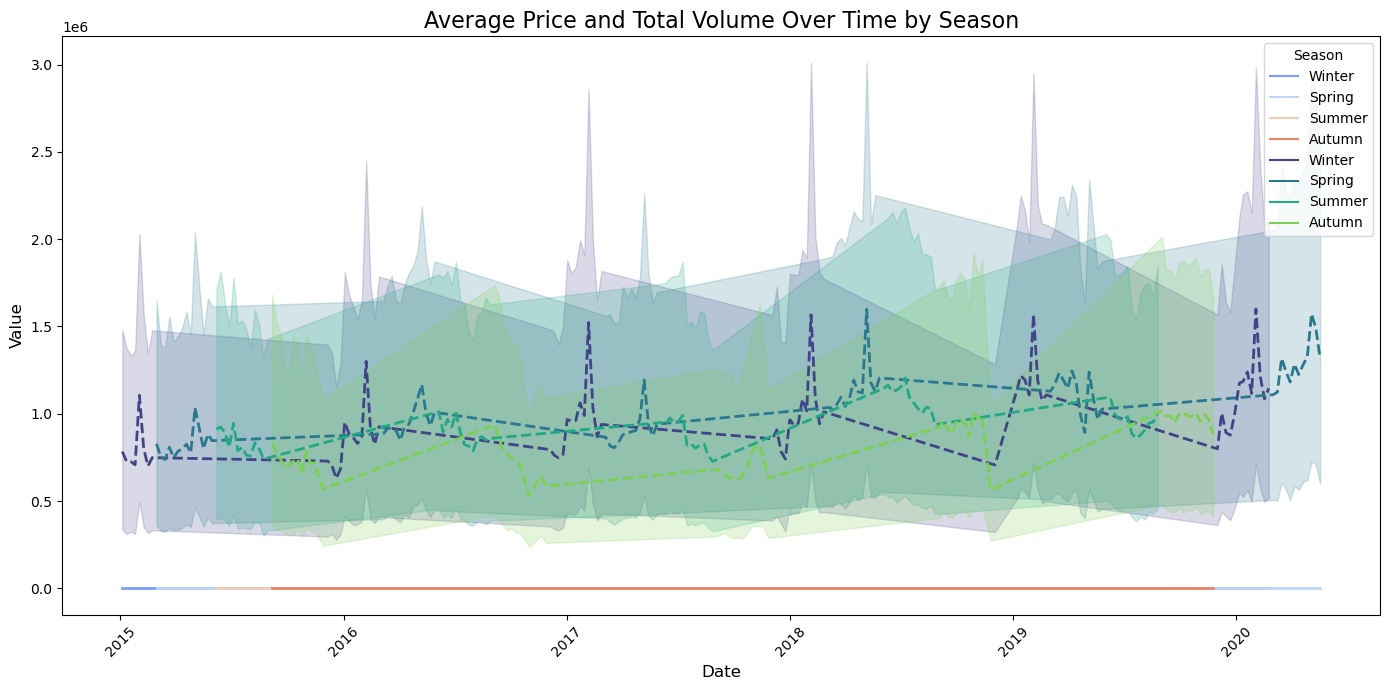

In [13]:
# This plot shows the relationship between average price and total sales over time, with seasonal differentiation.
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='date', y='average_price', hue='season', palette='coolwarm', linewidth=2)
sns.lineplot(data=df, x='date', y='total_volume', hue='season', palette='viridis', linewidth=2, linestyle='--')
plt.title('Average Price and Total Volume Over Time by Season', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

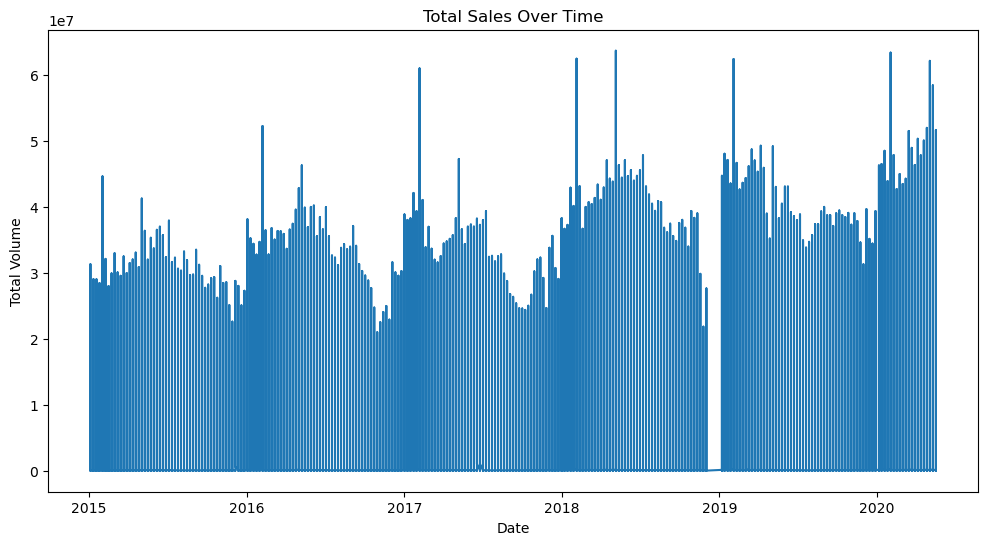

In [14]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['total_volume'])
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.show()

# Insight: Shows the trend of total sales over time, revealing patterns or fluctuations.

## Outlier

In [15]:
Q1 = df['total_volume'].quantile(0.25)
Q3 = df['total_volume'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['total_volume'] < (Q1 - 1.5 * IQR)) | (df['total_volume'] > (Q3 + 1.5 * IQR))]
outliers

# Identifies outliers in the 'total_volume' based on the IQR method, which highlights unusually high or low values.

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,is_holiday,promotion,month,season
12,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California,0,0,1,Winter
30,2015-01-04,1.02,3382800.12,467259.47,2059657.71,318102.38,537780.56,412779.64,111072.91,13928.01,conventional,2015,Great Lakes,0,0,1,Winter
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,0,0,1,Winter
50,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,314.80,conventional,2015,Midsouth,0,0,1,Winter
56,2015-01-04,1.09,1402890.20,23641.00,1127882.44,1871.07,249495.69,178683.01,70812.68,0.00,conventional,2015,New York,0,0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30005,2020-05-17,1.13,6220501.34,2876093.28,240565.42,4141.94,3099513.92,2707268.67,381117.10,11128.15,conventional,2020,Southeast,0,0,5,Spring
30015,2020-05-17,1.16,51690121.14,15951219.72,9221698.67,728025.52,25788840.09,16896405.58,7972084.51,920350.00,conventional,2020,Total U.S.,0,0,5,Spring
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.,0,0,5,Spring
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West,0,0,5,Spring


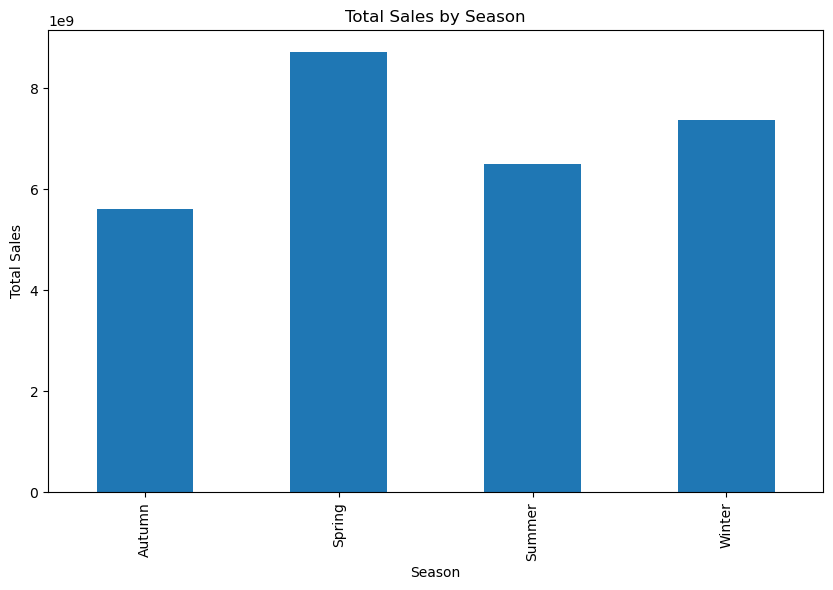

In [16]:
season_sales = df.groupby('season')['total_volume'].sum()
season_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()

# Insight: Shows total sales by season, highlighting which seasons have the highest sales.

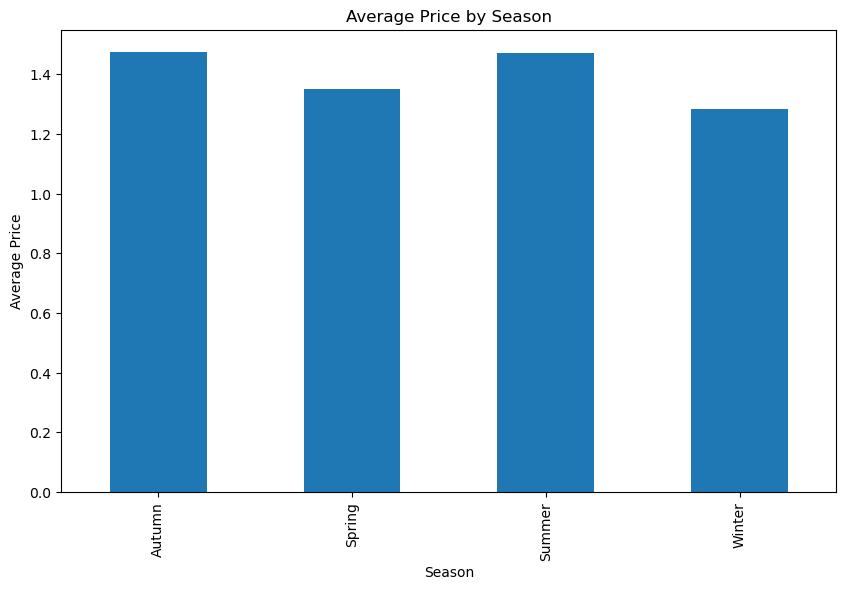

In [17]:
season_price = df.groupby('season')['average_price'].mean()
season_price.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.show()

# Insight: Shows the average price by season, revealing price trends throughout the year.

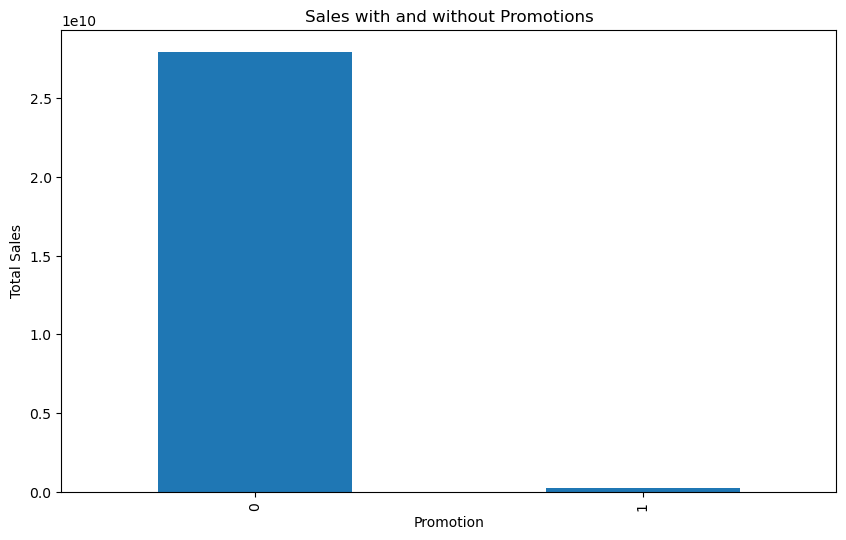

In [18]:
promotion_sales = df.groupby('promotion')['total_volume'].sum()
promotion_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales with and without Promotions')
plt.xlabel('Promotion')
plt.ylabel('Total Sales')
plt.show()

# Insight: Compares total sales with and without promotions, showing the impact of promotional events on sales.

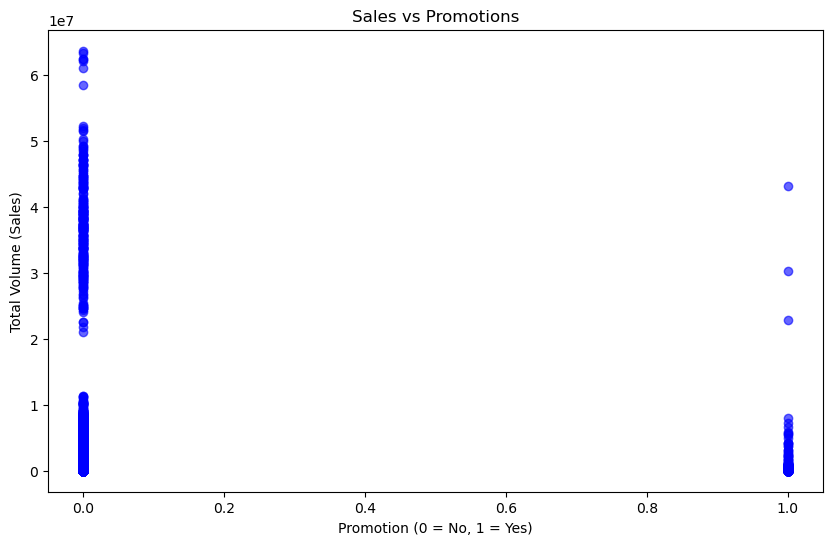

In [19]:
# Scatter plot of sales vs promotions
plt.figure(figsize=(10, 6))
plt.scatter(df['promotion'], df['total_volume'], color='blue', alpha=0.6)
plt.title('Sales vs Promotions')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Total Volume (Sales)')
plt.show()

# Insight: Displays the relationship between promotions and total sales, showing how promotions affect sales volume.

In [20]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,is_holiday,promotion,month,season
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,0,0,1,Winter
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,0,0,1,Winter
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,0,0,1,Winter
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,0,0,1,Winter
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,0,0,1,Winter


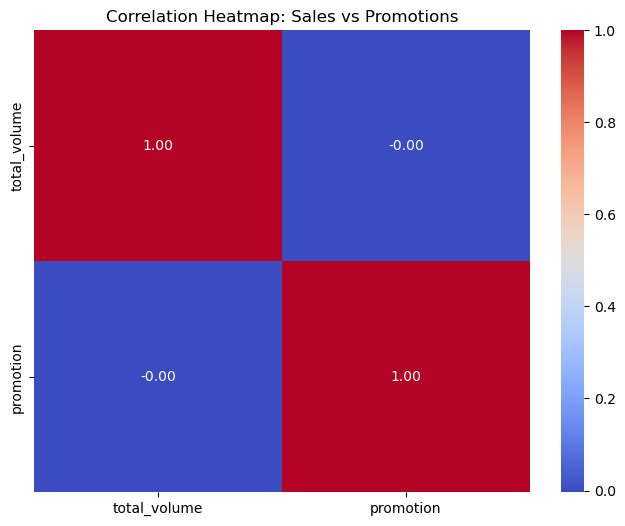

In [21]:
correlation_matrix = df[['total_volume', 'promotion']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: Sales vs Promotions')
plt.show()

# Displays the correlation between sales and promotions, highlighting the strength of their relationship.

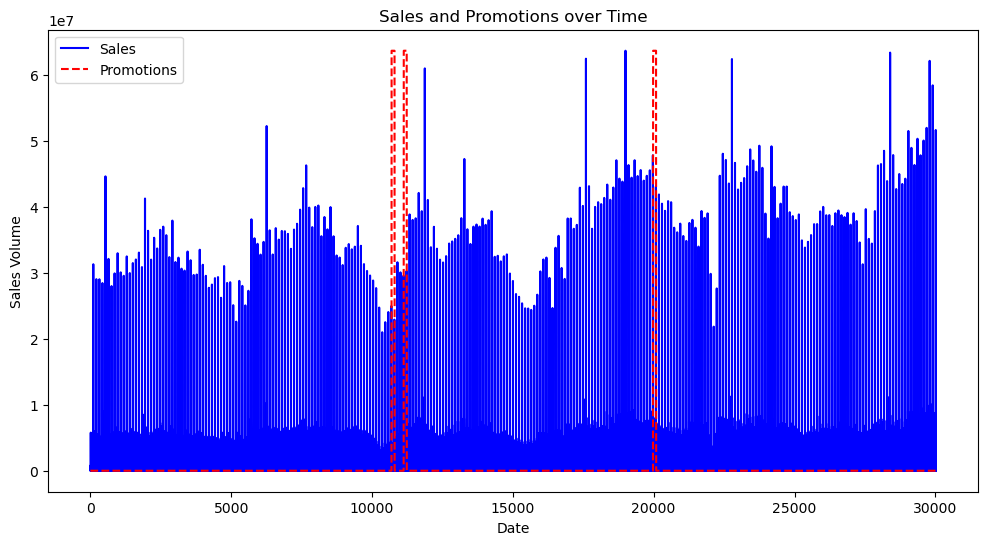

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['total_volume'], label='Sales', color='blue')
plt.plot(df.index, df['promotion'] * df['total_volume'].max(), label='Promotions', color='red', linestyle='--')
plt.title('Sales and Promotions over Time')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

# Compares sales and promotions over time, showing the effect of promotions on sales volume.

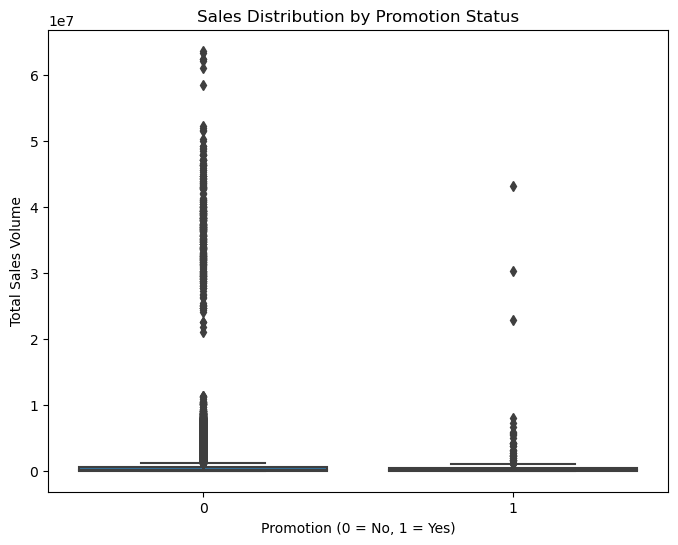

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='promotion', y='total_volume', data=df)
plt.title('Sales Distribution by Promotion Status')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Total Sales Volume')
plt.show()

# Shows the distribution of sales volume with and without promotions, highlighting differences.

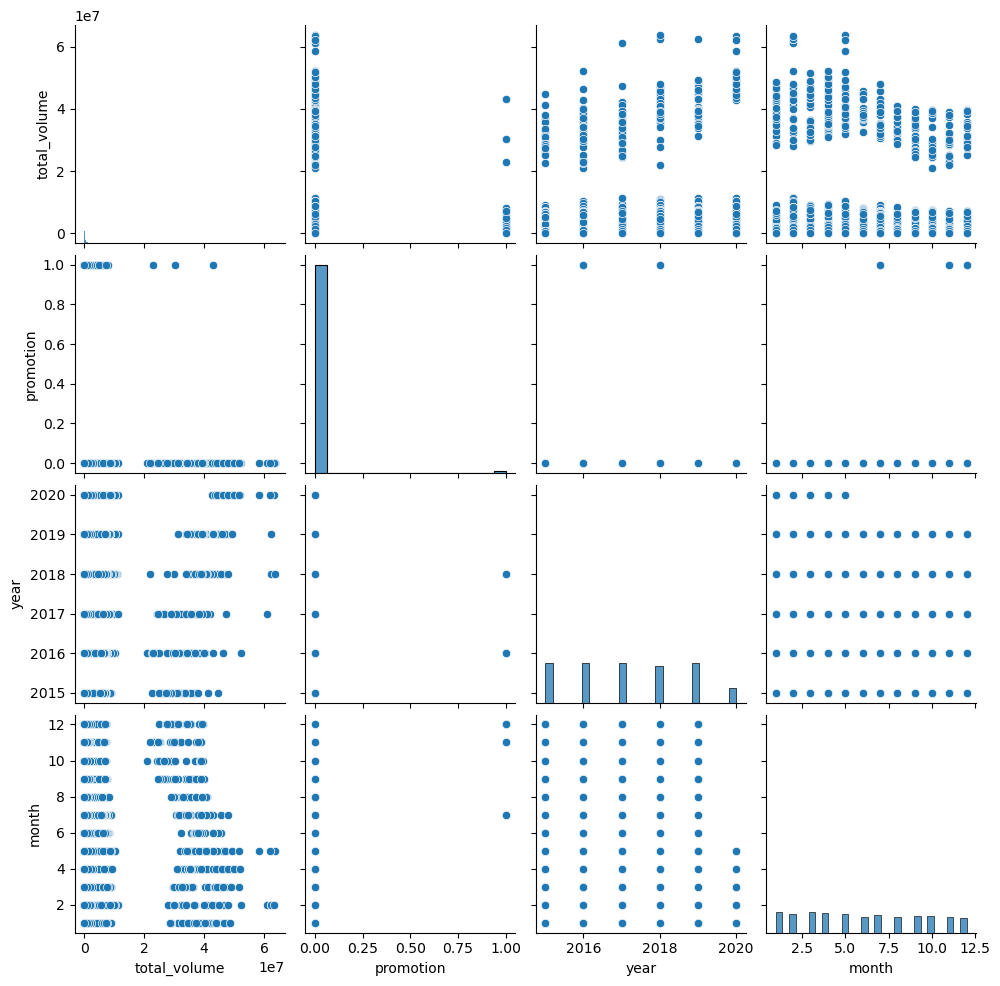

In [24]:
sns.pairplot(df[['total_volume', 'promotion', 'year', 'month']])
plt.show()

# Visualizes relationships between sales, promotions, year, and month to spot patterns.

#preprocessing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           30021 non-null  datetime64[ns]
 1   average_price  30021 non-null  float64       
 2   total_volume   30021 non-null  float64       
 3   4046           30021 non-null  float64       
 4   4225           30021 non-null  float64       
 5   4770           30021 non-null  float64       
 6   total_bags     30021 non-null  float64       
 7   small_bags     30021 non-null  float64       
 8   large_bags     30021 non-null  float64       
 9   xlarge_bags    30021 non-null  float64       
 10  type           30021 non-null  object        
 11  year           30021 non-null  int64         
 12  geography      30021 non-null  object        
 13  is_holiday     30021 non-null  int32         
 14  promotion      30021 non-null  int32         
 15  month          3002

In [26]:
df.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
is_holiday       0
promotion        0
month            0
season           0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
df['geography'].value_counts()

Albany                  556
Sacramento              556
Northeast               556
Northern New England    556
Orlando                 556
Philadelphia            556
Phoenix/Tucson          556
Pittsburgh              556
Plains                  556
Portland                556
Raleigh/Greensboro      556
Richmond/Norfolk        556
Roanoke                 556
San Diego               556
Atlanta                 556
San Francisco           556
Seattle                 556
South Carolina          556
South Central           556
Southeast               556
Spokane                 556
St. Louis               556
Syracuse                556
Tampa                   556
Total U.S.              556
West                    556
New York                556
New Orleans/Mobile      556
Nashville               556
Midsouth                556
Baltimore/Washington    556
Boise                   556
Boston                  556
Buffalo/Rochester       556
California              556
Charlotte           

In [29]:
df['type'].value_counts()

conventional    15012
organic         15009
Name: type, dtype: int64

In [30]:
df['year'].value_counts()

2017    5722
2016    5616
2019    5616
2015    5615
2018    5292
2020    2160
Name: year, dtype: int64

In [31]:
for col in df.select_dtypes(include='object').columns:
    print(col, ":", df[col].unique())

type : ['conventional' 'organic']
geography : ['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago'
 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit'
 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield'
 'Houston' 'Indianapolis' 'Jacksonville' 'Las Vegas' 'Los Angeles'
 'Louisville' 'Miami/Ft. Lauderdale' 'Midsouth' 'Nashville'
 'New Orleans/Mobile' 'New York' 'Northeast' 'Northern New England'
 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh' 'Plains'
 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'South Central'
 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa' 'Total U.S.' 'West'
 'West Tex/New Mexico']
season : ['Winter' 'Spring' 'Summer' 'Autumn']


In [32]:
(df[['4046', '4225', '4770', 'total_bags']] == 0).sum()


4046           369
4225           240
4770          9317
total_bags      15
dtype: int64

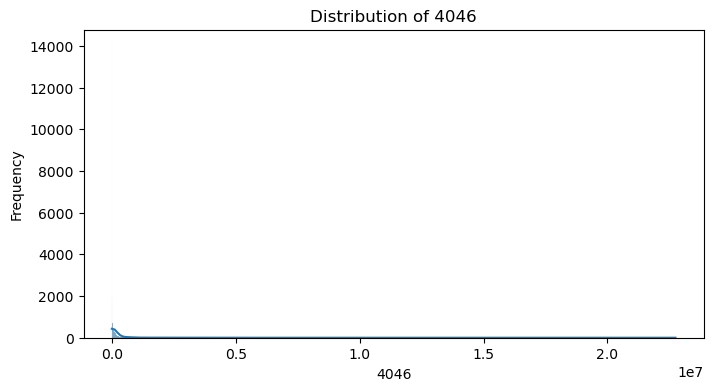

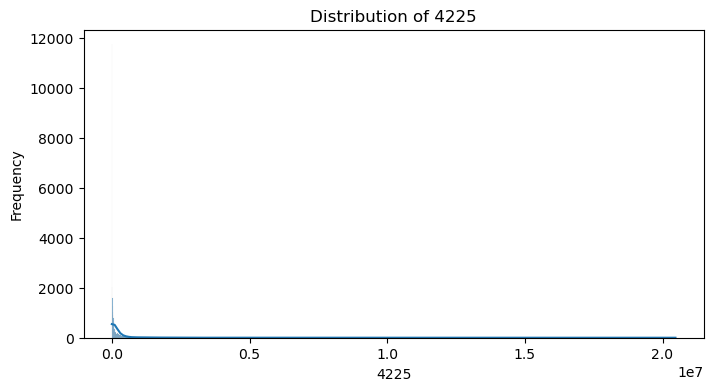

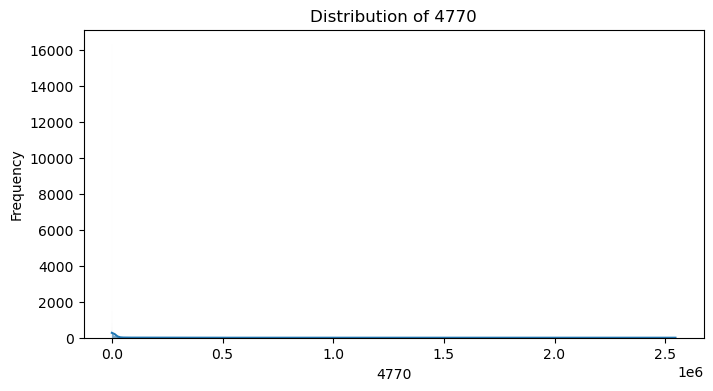

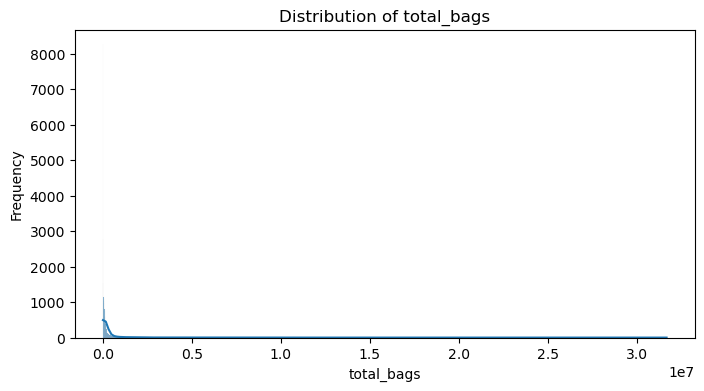

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_with_missing = ['4046', '4225', '4770', 'total_bags']

for col in cols_with_missing:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plots the distribution of columns with missing values to analyze their frequency and shape.

In [34]:
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,is_holiday,promotion,month,season
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,0,0,1,Winter
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,0,0,1,Winter
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,0,0,1,Winter
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,0,0,1,Winter
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,0,0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.,0,0,5,Spring
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West,0,0,5,Spring
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West,0,0,5,Spring
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico,0,0,5,Spring


In [35]:
cols_to_impute = ['4046', '4225', '4770']
for col in cols_to_impute:
    df[col] = df[col].replace(0, df[col].mean())

# Replaces 0 values in selected columns with the mean of each column to handle missing data.

In [36]:
df_with_zero_total_bags = df[df['total_bags'] == 0]

df_with_zero_total_bags

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,is_holiday,promotion,month,season
851,2015-02-22,1.41,4655.86,2067.41,2588.45,21629.374703,0.0,0.0,0.0,0.0,organic,2015,Spokane,0,0,2,Winter
1285,2015-03-22,1.83,3795.21,1305.95,2489.26,21629.374703,0.0,0.0,0.0,0.0,organic,2015,St. Louis,0,0,3,Spring
1489,2015-04-05,1.55,26530.70,17104.69,9426.01,21629.374703,0.0,0.0,0.0,0.0,organic,2015,San Francisco,1,0,4,Spring
1597,2015-04-12,1.54,28220.45,18887.66,9332.79,21629.374703,0.0,0.0,0.0,0.0,organic,2015,San Francisco,0,0,4,Spring
1839,2015-05-03,2.03,3976.19,1325.62,2650.57,21629.374703,0.0,0.0,0.0,0.0,organic,2015,Atlanta,0,0,5,Spring
2687,2015-06-21,1.59,4436.79,872.72,3564.07,21629.374703,0.0,0.0,0.0,0.0,organic,2015,Spokane,0,0,6,Summer
2773,2015-06-28,1.53,41116.32,7314.21,33780.38,21.730000,0.0,0.0,0.0,0.0,organic,2015,Portland,0,0,6,Summer
2787,2015-06-28,1.71,46229.47,8112.46,37972.31,144.700000,0.0,0.0,0.0,0.0,organic,2015,Seattle,0,0,6,Summer
2795,2015-06-28,1.61,4088.37,537.84,3550.53,21629.374703,0.0,0.0,0.0,0.0,organic,2015,Spokane,0,0,6,Summer
2895,2015-07-05,1.98,29929.57,8841.34,20807.76,280.470000,0.0,0.0,0.0,0.0,organic,2015,Seattle,0,0,7,Summer


In [37]:
df.describe()


,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year,is_holiday,promotion,month
count,30021.000000,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,30021.000000,30021.000000,30021.000000,30021.000000
mean,1.390930,9.392546e+05,3.027838e+05,2.871790e+05,2.834204e+04,3.335336e+05,2.321256e+05,9.518529e+04,6.222717e+03,2017.205123,0.035975,0.010792,6.176077
std,0.381347,3.813519e+06,1.288676e+06,1.168799e+06,9.997175e+04,1.415618e+06,9.505028e+05,4.672104e+05,3.813737e+04,1.570133,0.186230,0.103326,3.439344
min,0.440000,8.456000e+01,1.000000e+00,1.000000e+00,8.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000,0.000000,0.000000,1.000000
25%,1.110000,1.429853e+04,9.003700e+02,2.998490e+03,4.559700e+02,8.373820e+03,5.955980e+03,3.515900e+02,0.000000e+00,2016.000000,0.000000,0.000000,3.000000
50%,1.350000,1.242047e+05,1.211755e+04,2.602958e+04,1.052356e+04,5.039131e+04,3.425532e+04,5.171120e+03,0.000000e+00,2017.000000,0.000000,0.000000,6.000000
75%,1.630000,4.898029e+05,1.248940e+05,1.529131e+05,2.162937e+04,1.591742e+05,1.129384e+05,3.606762e+04,5.600000e+02,2019.000000,0.000000,0.000000,9.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.022564e+06,2020.000000,1.000000,1.000000,12.000000


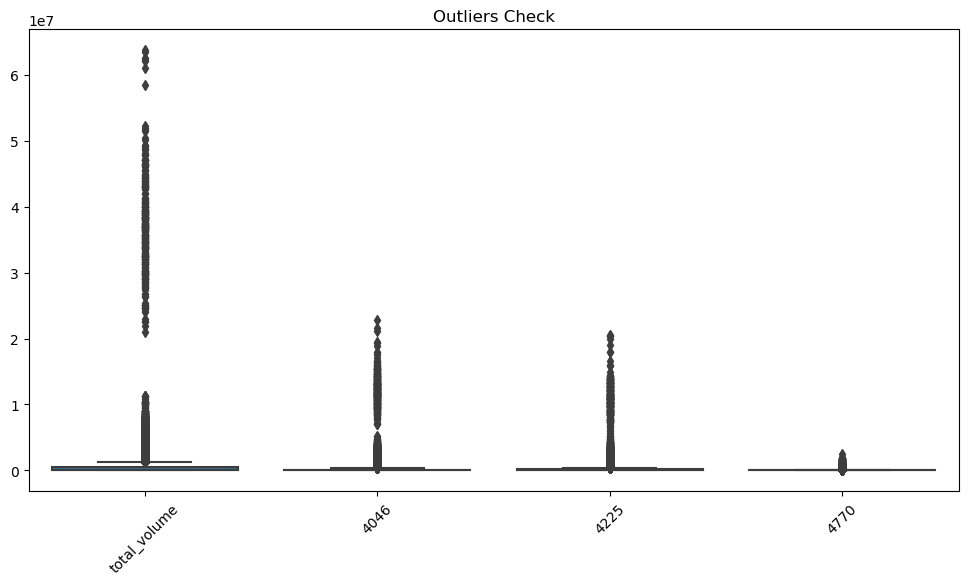

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['total_volume', '4046', '4225', '4770']])
plt.xticks(rotation=45)
plt.title("Outliers Check")
plt.show()

# Displays boxplots to identify potential outliers in sales and selected product columns.

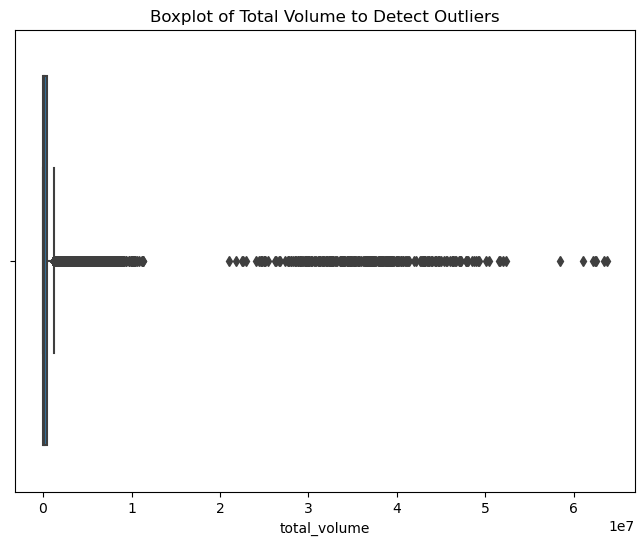

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total_volume'])
plt.title('Boxplot of Total Volume to Detect Outliers')
plt.show()

# Displays a boxplot to detect outliers in the total sales volume.

#### Outlier

In [40]:
Q1 = df['total_volume'].quantile(0.25)
Q3 = df['total_volume'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_volume'] < lower_bound) | (df['total_volume'] > upper_bound)]
print(f"number of outliers: {outliers.shape[0]}")

# Identifies and counts the number of outliers in the 'total_volume' based on the IQR method.

number of outliers: 3694


In [41]:
median_value = df['total_volume'].median()
df['total_volume'] = df['total_volume'].apply(lambda x: median_value if x > upper_bound or x < lower_bound else x)

# Replaces outliers in 'total_volume' with the median value.

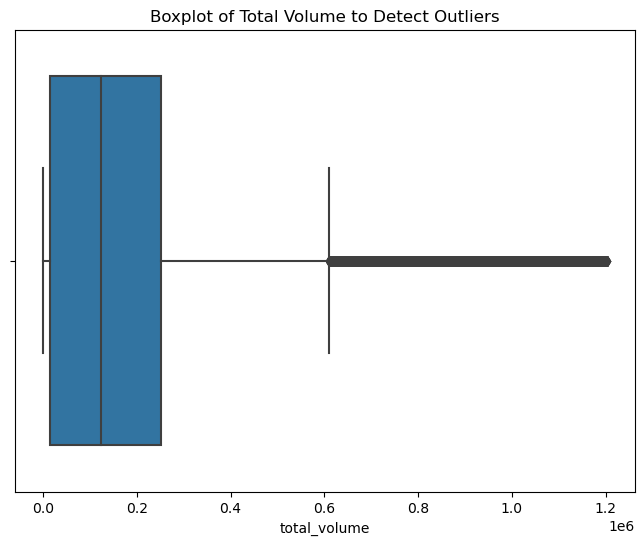

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total_volume'])
plt.title('Boxplot of Total Volume to Detect Outliers')
plt.show()

# Displays a boxplot to visually check for any remaining outliers in the 'total_volume' after imputation.

#feature engineering

In [43]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,is_holiday,promotion,month,season
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.900000,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,0,0,1,Winter
1,2015-01-04,1.79,1373.95,57.42,153.88,21629.374703,1162.65,1162.65,0.00,0.0,organic,2015,Albany,0,0,1,Winter
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.150000,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,0,0,1,Winter
3,2015-01-04,1.76,3846.69,1500.15,938.35,21629.374703,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,0,0,1,Winter
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.030000,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,0,0,1,Winter


In [44]:
# Extracting the weekday name from the 'date' column.
df['weekday_name'] = df['date'].dt.day_name()

In [45]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,is_holiday,promotion,month,season,weekday_name
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.900000,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,0,0,1,Winter,Sunday
1,2015-01-04,1.79,1373.95,57.42,153.88,21629.374703,1162.65,1162.65,0.00,0.0,organic,2015,Albany,0,0,1,Winter,Sunday
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.150000,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,0,0,1,Winter,Sunday
3,2015-01-04,1.76,3846.69,1500.15,938.35,21629.374703,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,0,0,1,Winter,Sunday
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.030000,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,0,0,1,Winter,Sunday


In [46]:
# Creating a binary column for Christmas season (November and December).
df['is_christmas_season'] = df['month'].isin([11, 12]).astype(int)

In [47]:
# Calculating the promotion effect by multiplying promotion flag with total volume.
df['promotion_effect'] = df['promotion'] * df['total_volume']

In [48]:
# Calculating the correlation between 'total_volume' and 'average_price'.
df[['total_volume', 'average_price']].corr()

,total_volume,average_price
total_volume,1.000000,-0.386337
average_price,-0.386337,1.000000


In [49]:
# Mapping 'geography' values to 'Region A' or 'Region B' based on the 'geography' column.
df['region'] = df['geography'].apply(lambda x: 'Region A' if x == 'A' else 'Region B')

In [50]:
# Creating a new column to capture the interaction between total volume and average price.
df['volume_price_interaction'] = df['total_volume'] * df['average_price']

In [51]:
df.head(10)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,...,geography,is_holiday,promotion,month,season,weekday_name,is_christmas_season,promotion_effect,region,volume_price_interaction
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.900000,9716.46,9186.93,529.53,0.0,...,Albany,0,0,1,Winter,Sunday,0,0.0,Region B,49865.4016
1,2015-01-04,1.79,1373.95,57.42,153.88,21629.374703,1162.65,1162.65,0.00,0.0,...,Albany,0,0,1,Winter,Sunday,0,0.0,Region B,2459.3705
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.150000,46815.79,16707.15,30108.64,0.0,...,Atlanta,0,0,1,Winter,Sunday,0,0.0,Region B,435021.4900
3,2015-01-04,1.76,3846.69,1500.15,938.35,21629.374703,1408.19,1071.35,336.84,0.0,...,Atlanta,0,0,1,Winter,Sunday,0,0.0,Region B,6770.1744
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.030000,141136.68,137146.07,3990.61,0.0,...,Baltimore/Washington,0,0,1,Winter,Sunday,0,0.0,Region B,851067.0648
5,2015-01-04,1.29,19137.28,8040.64,6557.47,657.480000,3881.69,3881.69,0.00,0.0,...,Baltimore/Washington,0,0,1,Winter,Sunday,0,0.0,Region B,24687.0912
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.350000,7755.62,6064.30,1691.32,0.0,...,Boise,0,0,1,Winter,Sunday,0,0.0,Region B,80834.6632
7,2015-01-04,1.64,1505.12,1.27,1129.50,21629.374703,374.35,186.67,187.68,0.0,...,Boise,0,0,1,Winter,Sunday,0,0.0,Region B,2468.3968
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.820000,87663.13,87406.84,256.29,0.0,...,Boston,0,0,1,Winter,Sunday,0,0.0,Region B,501572.7600
9,2015-01-04,1.83,2192.13,8.66,939.43,21629.374703,1244.04,1244.04,0.00,0.0,...,Boston,0,0,1,Winter,Sunday,0,0.0,Region B,4011.5979


In [52]:
# Creating a new column to capture the interaction between promotion and total volume.
df['promotion_interaction'] = df['promotion'] * df['total_volume']

In [53]:
# Calculating the percentage change in total volume month-over-month.
df['month_change'] = df['total_volume'].pct_change()

In [54]:
# Dropping the 'small_bags', 'large_bags', and 'xlarge_bags' columns as they might not be needed for the analysis or could introduce redundancy.
df.drop(columns=['small_bags', 'large_bags', 'xlarge_bags'], inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      30021 non-null  datetime64[ns]
 1   average_price             30021 non-null  float64       
 2   total_volume              30021 non-null  float64       
 3   4046                      30021 non-null  float64       
 4   4225                      30021 non-null  float64       
 5   4770                      30021 non-null  float64       
 6   total_bags                30021 non-null  float64       
 7   type                      30021 non-null  object        
 8   year                      30021 non-null  int64         
 9   geography                 30021 non-null  object        
 10  is_holiday                30021 non-null  int32         
 11  promotion                 30021 non-null  int32         
 12  month             

In [56]:
# Calculating the monthly average volume for each month and adding it as a new column.
df['monthly_avg_volume'] = df.groupby('month')['total_volume'].transform('mean')

In [57]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,type,year,geography,...,month,season,weekday_name,is_christmas_season,promotion_effect,region,volume_price_interaction,promotion_interaction,month_change,monthly_avg_volume
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.900000,9716.46,conventional,2015,Albany,...,1,Winter,Sunday,0,0.0,Region B,49865.4016,0.0,NaN,199834.61392
1,2015-01-04,1.79,1373.95,57.42,153.88,21629.374703,1162.65,organic,2015,Albany,...,1,Winter,Sunday,0,0.0,Region B,2459.3705,0.0,-0.966385,199834.61392
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.150000,46815.79,conventional,2015,Atlanta,...,1,Winter,Sunday,0,0.0,Region B,435021.4900,0.0,315.621049,199834.61392
3,2015-01-04,1.76,3846.69,1500.15,938.35,21629.374703,1408.19,organic,2015,Atlanta,...,1,Winter,Sunday,0,0.0,Region B,6770.1744,0.0,-0.991157,199834.61392
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.030000,141136.68,conventional,2015,Baltimore/Washington,...,1,Winter,Sunday,0,0.0,Region B,851067.0648,0.0,203.857958,199834.61392


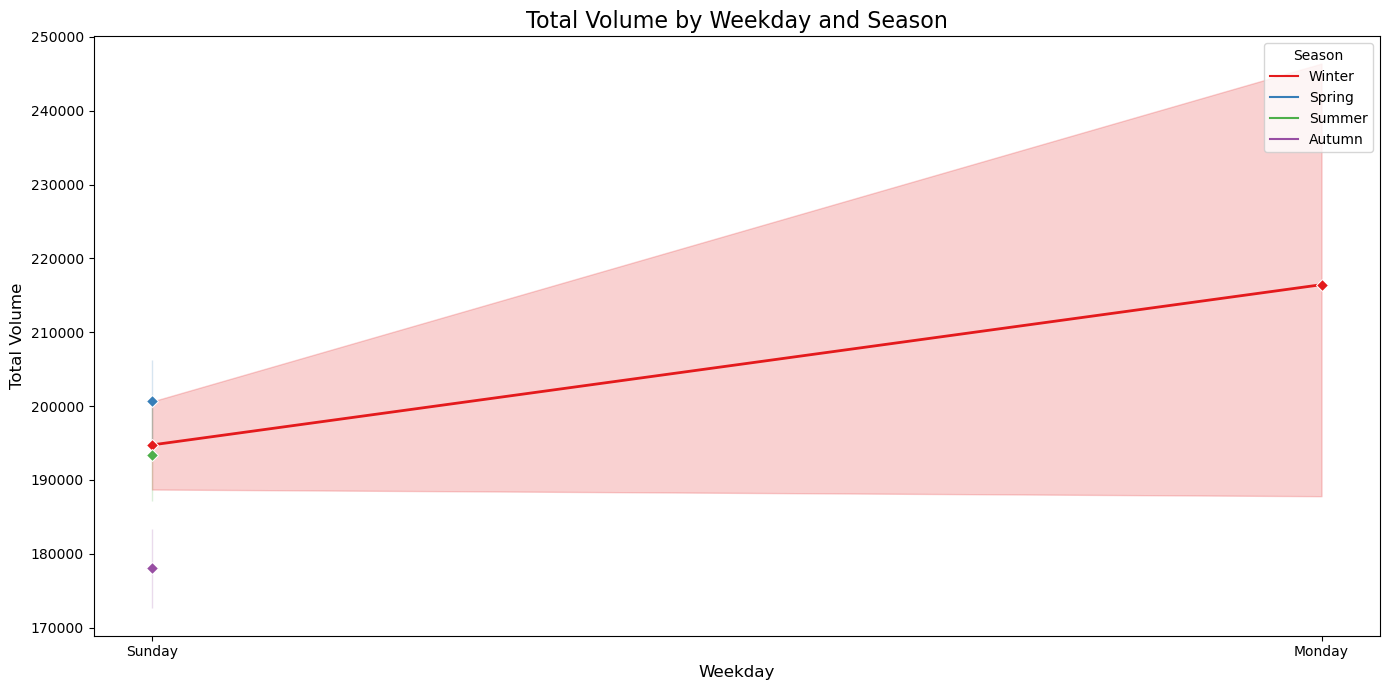

In [58]:
# This plot shows total volume of sales by weekday, highlighting seasonal differences. كيف يتغير حجم المبيعات حسب اليوم الأسبوعي مع تمييز الموسم
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='weekday_name', y='total_volume', hue='season', marker='D', palette='Set1', lw=2)
plt.title('Total Volume by Weekday and Season', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11624\2539624955.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='promotion', y='volume_price_interaction', marker='o', palette='Blues', lw=2)


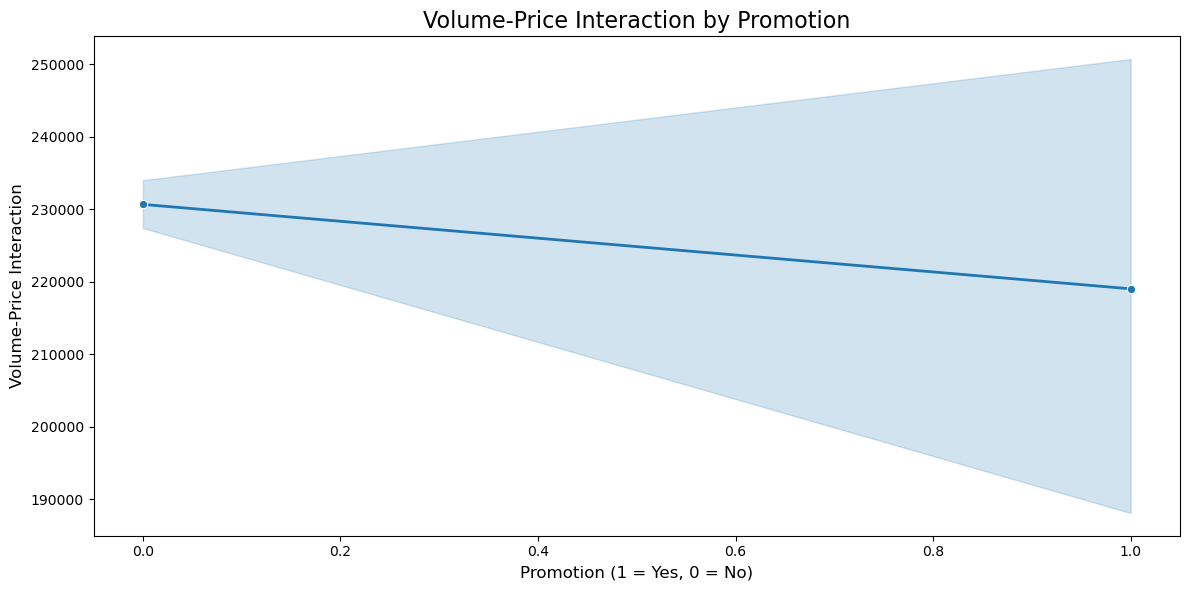

In [59]:
# This plot shows how volume-price interaction is affected by promotions.
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='promotion', y='volume_price_interaction', marker='o', palette='Blues', lw=2)
plt.title('Volume-Price Interaction by Promotion', fontsize=16)
plt.xlabel('Promotion (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Volume-Price Interaction', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11624\3374986031.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='volume_price_interaction', y='total_volume', marker='o', palette='Blues', lw=2)


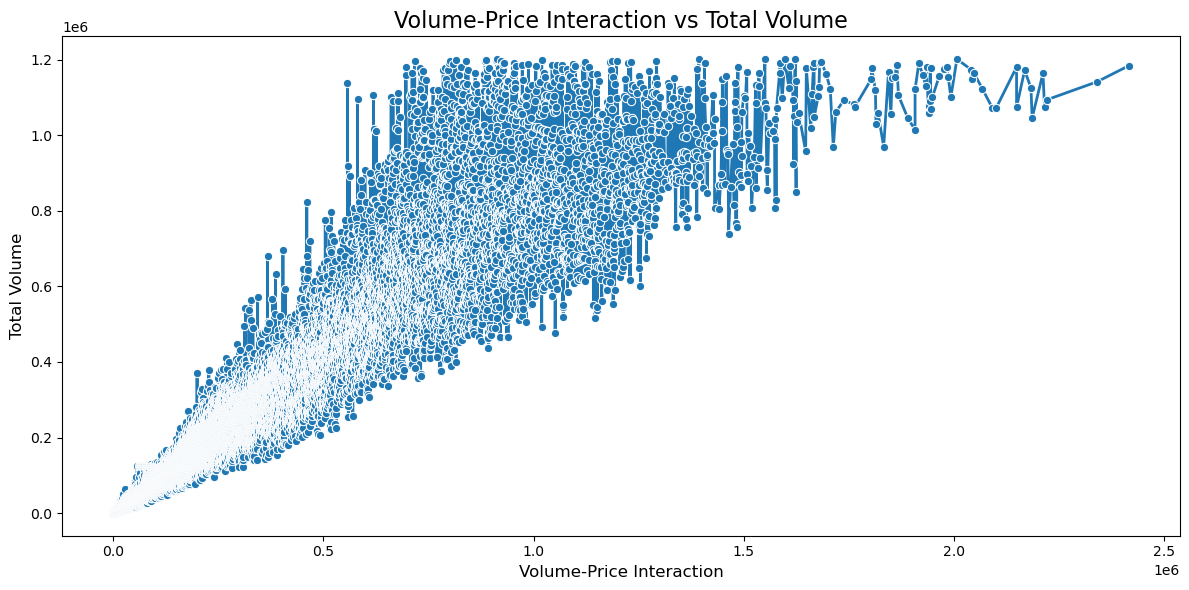

In [60]:
# This plot shows the relationship between volume-price interaction and total sales volume.
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='volume_price_interaction', y='total_volume', marker='o', palette='Blues', lw=2)
plt.title('Volume-Price Interaction vs Total Volume', fontsize=16)
plt.xlabel('Volume-Price Interaction', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)
plt.tight_layout()
plt.show()

In [61]:
# Calculate the correlation matrix for all numeric columns
correlation_matrix = df.corr()

# Display the correlation with total_volume
correlation_with_sales = correlation_matrix['total_volume'].sort_values(ascending=False)
print(correlation_with_sales)

total_volume                1.000000
volume_price_interaction    0.952286
month_change                0.512560
promotion_effect            0.083216
promotion_interaction       0.083216
year                        0.052114
monthly_avg_volume          0.040336
4225                        0.021916
total_bags                  0.008963
4046                        0.003985
promotion                  -0.002647
is_holiday                 -0.002971
is_christmas_season        -0.025747
4770                       -0.029393
month                      -0.034732
average_price              -0.386337
Name: total_volume, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11624\3763127823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


## الأعمدة التي تؤثر بشكل إيجابي على حجم المبيعات:

1. **التفاعل بين الحجم والسعر** (`volume_price_interaction`): الارتباط قوي جدًا (0.95). هذا يشير إلى أن التفاعل بين حجم المبيعات والسعر له تأثير قوي على حجم المبيعات.
   
2. **التغير الشهري في المبيعات** (`month_change`): الارتباط متوسط (0.51)، ما يعني أن التغيرات الشهرية تؤثر بشكل معتدل على حجم المبيعات.

## الأعمدة ذات التأثير الضئيل على حجم المبيعات:

1. **تأثير الترويج** (`promotion_effect`): الارتباط ضعيف (0.08)، مما يعني أن تأثير الترويج على حجم المبيعات ليس قويًا جدًا في هذه البيانات.

2. **التفاعل الترويجي** (`promotion_interaction`): الارتباط أيضًا ضعيف (0.08)، ما يدل على أن التفاعل بين الحملات الترويجية وحجم المبيعات ليس له تأثير كبير.

## الأعمدة ذات التأثير السلبي على حجم المبيعات:

1. **متوسط السعر** (`average_price`): الارتباط سلبي (-0.39)، ما يعني أن زيادة السعر قد تؤدي إلى تقليل حجم المبيعات. هذا قد يكون بسبب أن الأسعار المرتفعة تؤثر سلبًا على الطلب.

## الأعمدة التي ليس لها تأثير كبير:

1. **السنة** (`year`): ارتباط ضعيف جدًا (0.05)، مما يعني أن السنة نفسها لا تؤثر بشكل كبير على حجم المبيعات.

2. **الأشهر** (`month`) و **الأعياد** (`is_holiday`) و **موسم عيد الميلاد** (`is_christmas_season`): كل هذه الأعمدة لها تأثير ضئيل جدًا على حجم المبيعات.


#Apply scaling/normalization

In [62]:
# Using get_dummies to convert categorical columns into binary format.
# This is useful for non-ordinal data where there's no inherent order between categories.
# It avoids creating false relationships between categories, making it ideal for machine learning models.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

numerical_columns = ['average_price', 'total_volume', '4046', '4225', '4770', 'total_bags', 'promotion_effect', 'volume_price_interaction', 'promotion_interaction', 'month_change']
categorical_columns = ['type', 'geography', 'season', 'weekday_name', 'region']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df_encoded = pd.get_dummies(df[categorical_columns], drop_first=False)
df = pd.concat([df.drop(columns=categorical_columns), df_encoded], axis=1)

df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,year,is_holiday,promotion,...,geography_Total U.S.,geography_West,geography_West Tex/New Mexico,season_Autumn,season_Spring,season_Summer,season_Winter,weekday_name_Monday,weekday_name_Sunday,region_Region B
0,2015-01-04,-0.448234,-0.601907,-0.232773,-0.221506,-0.283006,-0.228750,2015,0,0,...,0,0,0,0,0,0,1,0,1,1
1,2015-01-04,1.046494,-0.758779,-0.234917,-0.245577,-0.067147,-0.234792,2015,0,0,...,0,0,0,0,0,0,1,0,1,1
2,2015-01-04,-1.025147,0.963461,0.047739,-0.225327,-0.282683,-0.202542,2015,0,0,...,0,0,0,0,0,0,1,0,1,1
3,2015-01-04,0.967824,-0.748958,-0.233797,-0.244906,-0.067147,-0.234619,2015,0,0,...,0,0,0,0,0,0,1,0,1,1
4,2015-01-04,-0.815360,2.365421,-0.193067,0.227354,0.116565,-0.135912,2015,0,0,...,0,0,0,0,0,0,1,0,1,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 80 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            30021 non-null  datetime64[ns]
 1   average_price                   30021 non-null  float64       
 2   total_volume                    30021 non-null  float64       
 3   4046                            30021 non-null  float64       
 4   4225                            30021 non-null  float64       
 5   4770                            30021 non-null  float64       
 6   total_bags                      30021 non-null  float64       
 7   year                            30021 non-null  int64         
 8   is_holiday                      30021 non-null  int32         
 9   promotion                       30021 non-null  int32         
 10  month                           30021 non-null  int64         
 11  is